All models in this notebook are trained on the 'train-test-split' data

In [1]:
%matplotlib inline
import sys
sys.path.append('../..')
from analysis.analysistools import plot_PRCROC

# Feature Removal

## Precision Recall Curve

A description yanked off the sklearn website: Intuitively, precision is the ability of the classifier not to label as positive a sample that is negative, and recall is the ability of the classifier to find all the positive samples.

So a 1.0 precision means that the classifier will have no false negatives (it will label all bad pings as bad). However, if this is the case, then not all good points will be recalled by the classifier (some good will be called bad). Hence this trade-off curve. As the threshold of precision decreases, we improve our ability to recover all the good pings.

## Receiver Operating Characteristic
From wikipedia: "a graphical plot which illustrates the performance of a binary classifier system as its discrimination threshold is varied. It is created by plotting the fraction of true positives out of the positives (TPR = true positive rate) vs. the fraction of false positives out of the negatives (FPR = false positive rate), at various threshold settings. TPR is also known as sensitivity, and FPR is one minus the specificity or true negative rate."

This is similar to the pr curve. As the true positive rate increases (we're recovering more and more of the good pings), the false positive rate will increase, too (we'll call some bad pings "good").

## Base Model

In [2]:
sources = ['NGDC', 'US_multi']
scores_dir = "/swot2/features/MODEL_RUNS/00_ALL_FEATURES/train-test-split/runtime_scores/"

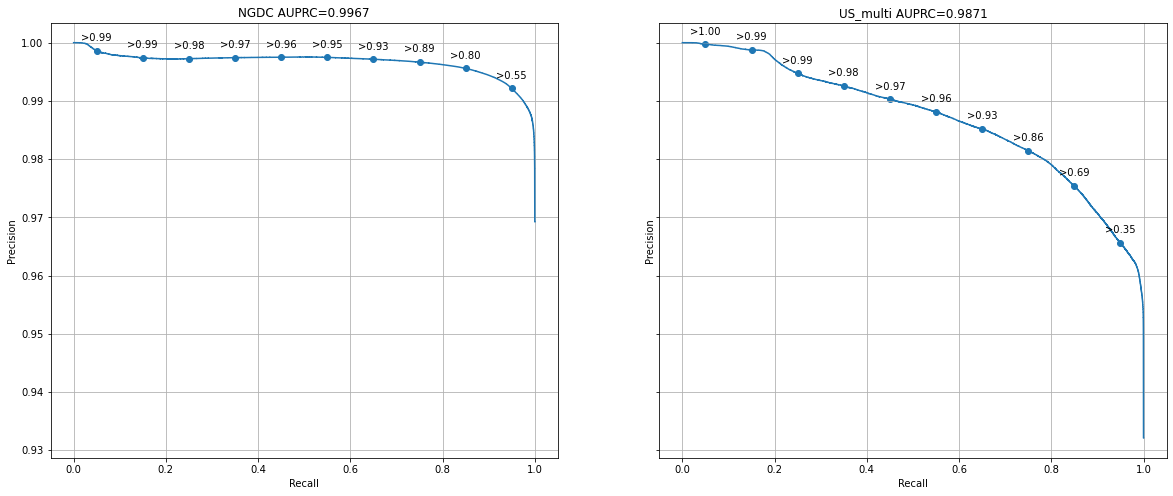

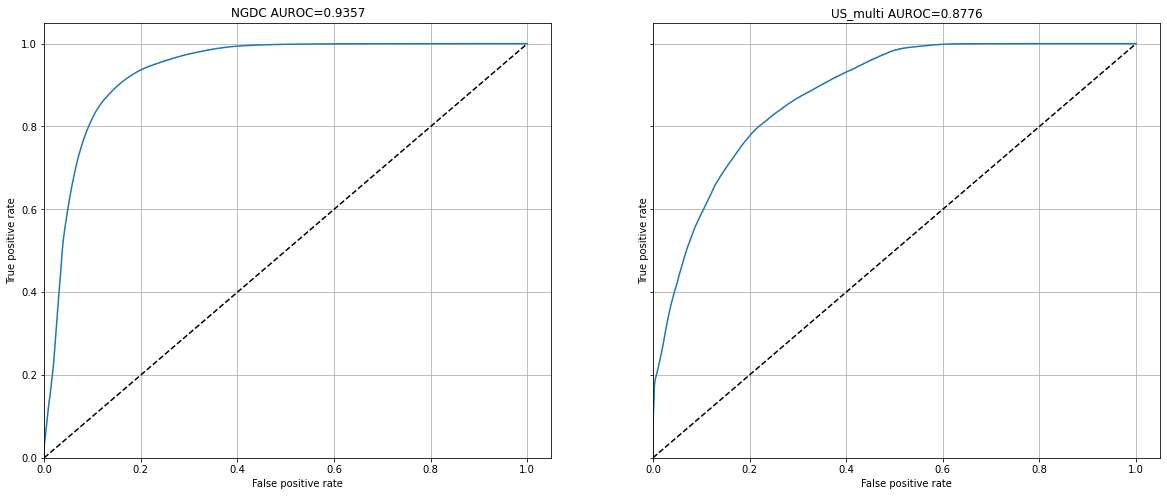

In [3]:
plot_PRCROC(sources,scores_dir)

# No lat, lon, year models

In [4]:
scores_dir = "/swot2/features/MODEL_RUNS/02_NO_LAT_LON_YR/train-test-split/runtime_scores/"

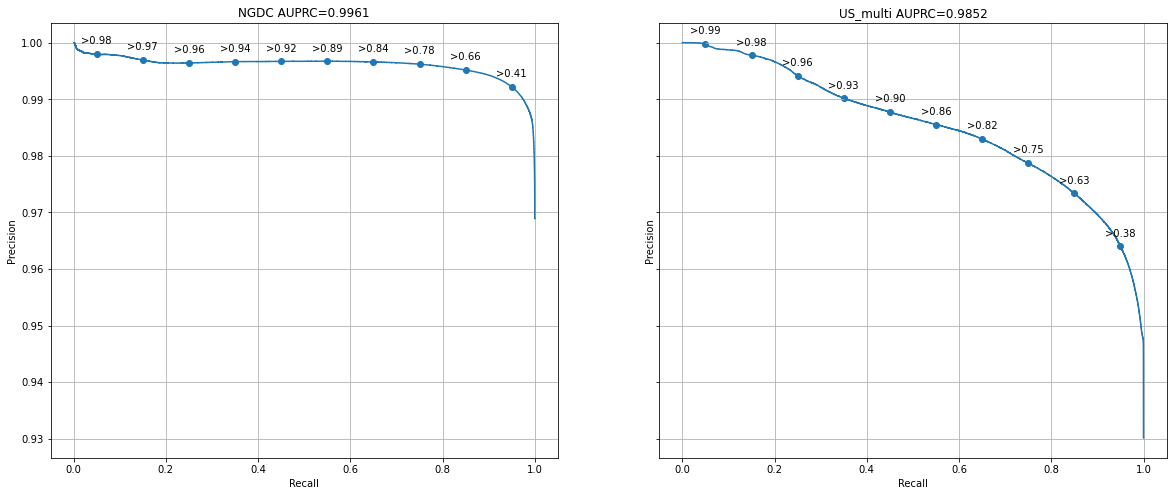

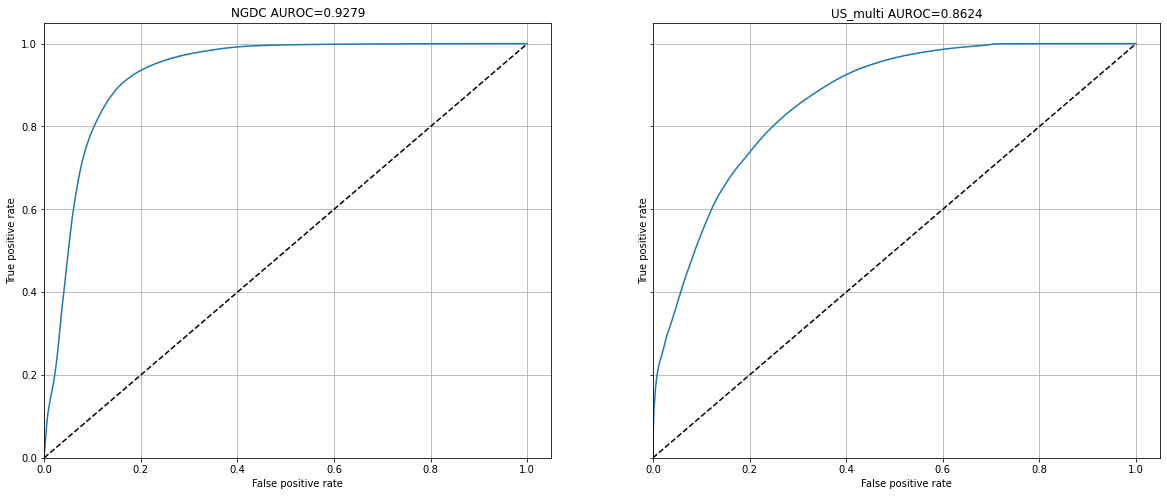

In [5]:
plot_PRCROC(sources,scores_dir)

## Remove d10 feature

In [6]:
scores_dir = "/swot2/features/MODEL_RUNS/04_NO_d10/train-test-split/runtime_scores/"

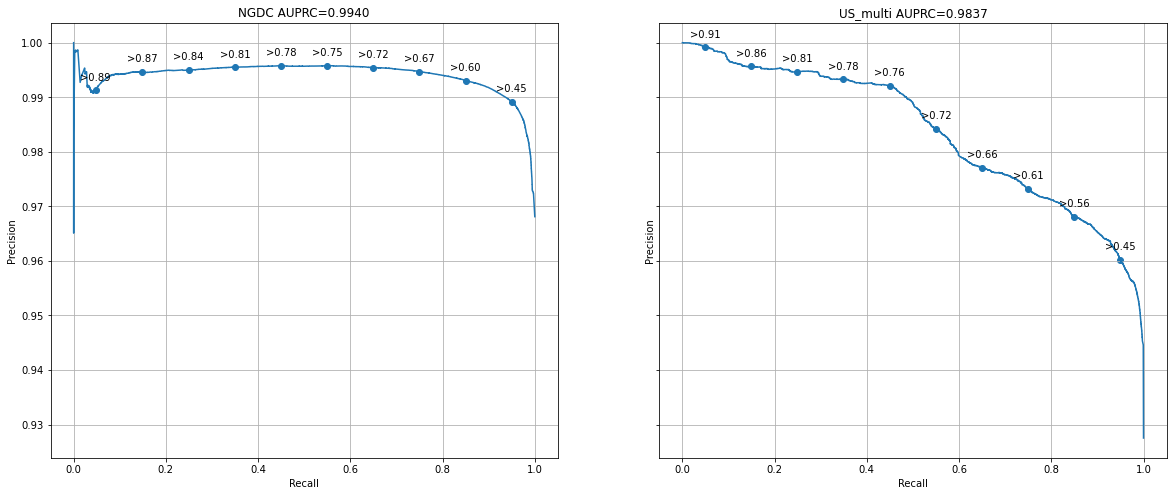

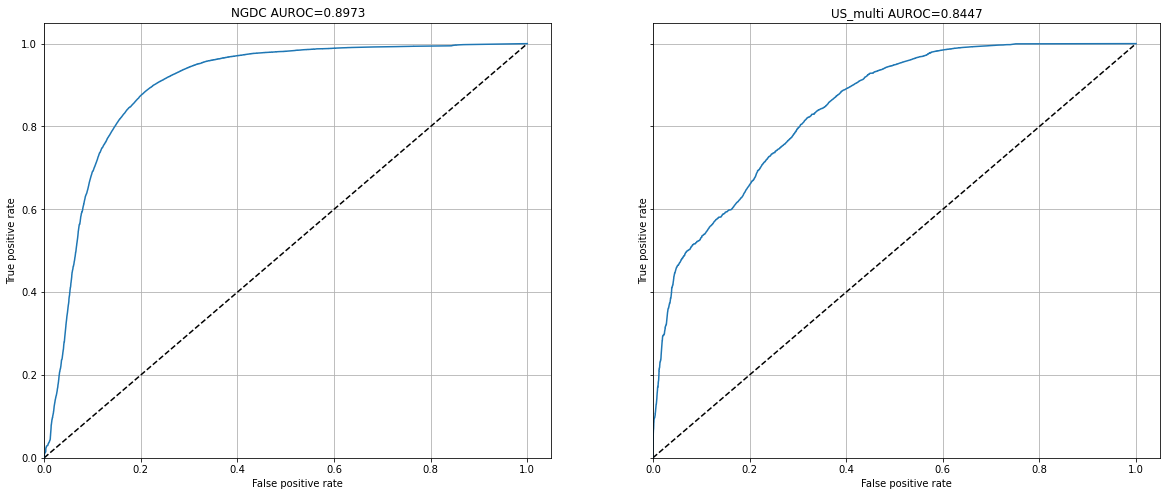

In [7]:
plot_PRCROC(sources,scores_dir)

## Remove d20 and NDP2.5 features

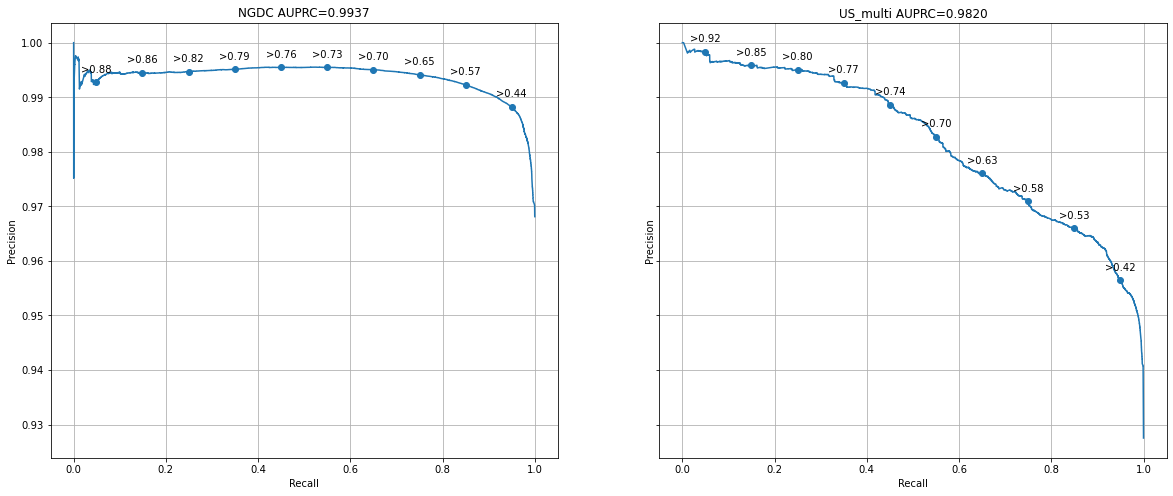

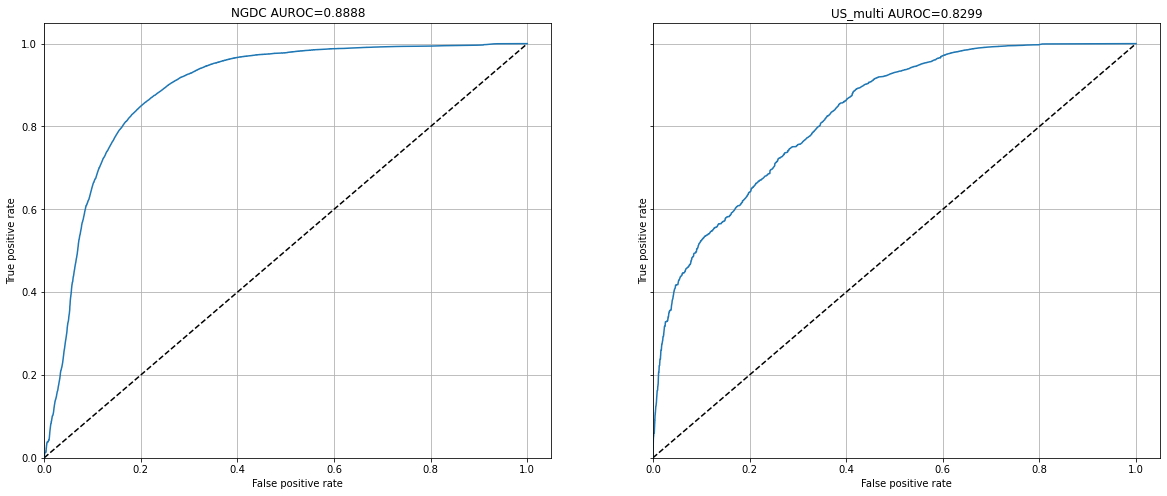

In [8]:
scores_dir = "/swot2/features/MODEL_RUNS/05_NO_d20/train-test-split/runtime_scores/"
plot_PRCROC(sources,scores_dir)

## Removed NDP5 feature

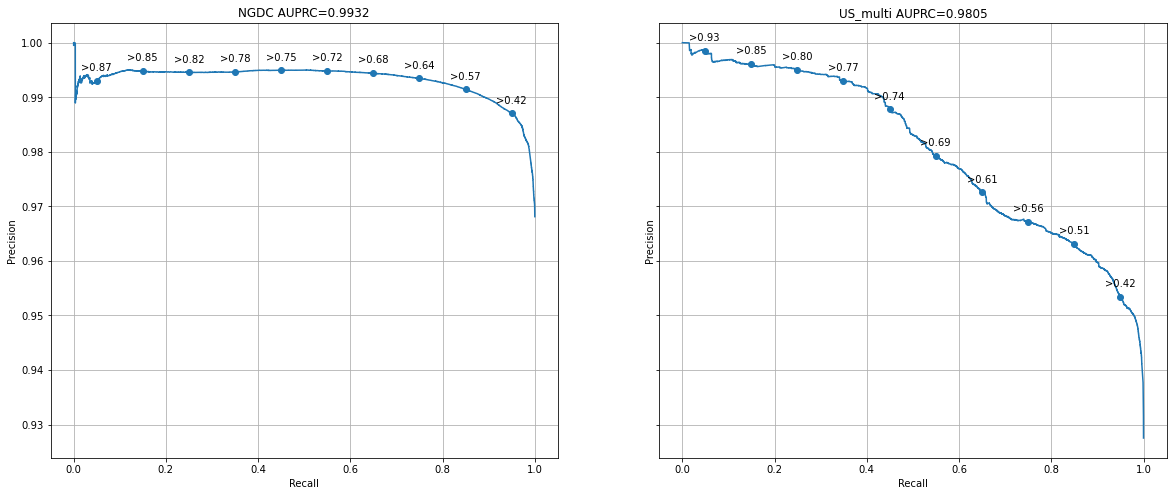

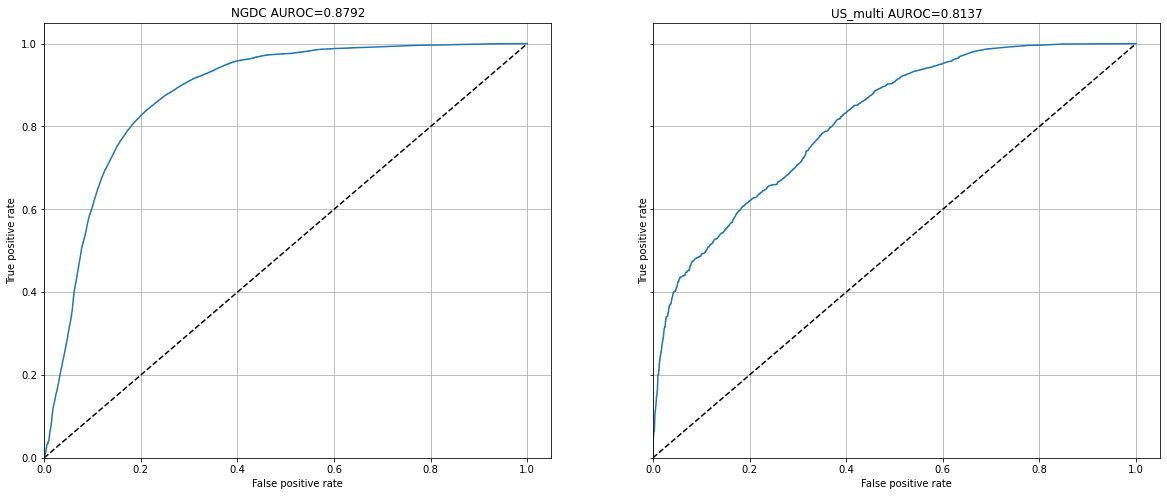

In [9]:
scores_dir = "/swot2/features/MODEL_RUNS/06_NO_NDP5/train-test-split/runtime_scores/"
plot_PRCROC(sources,scores_dir)

## Continue Removing Features... Remove d60, NDP10

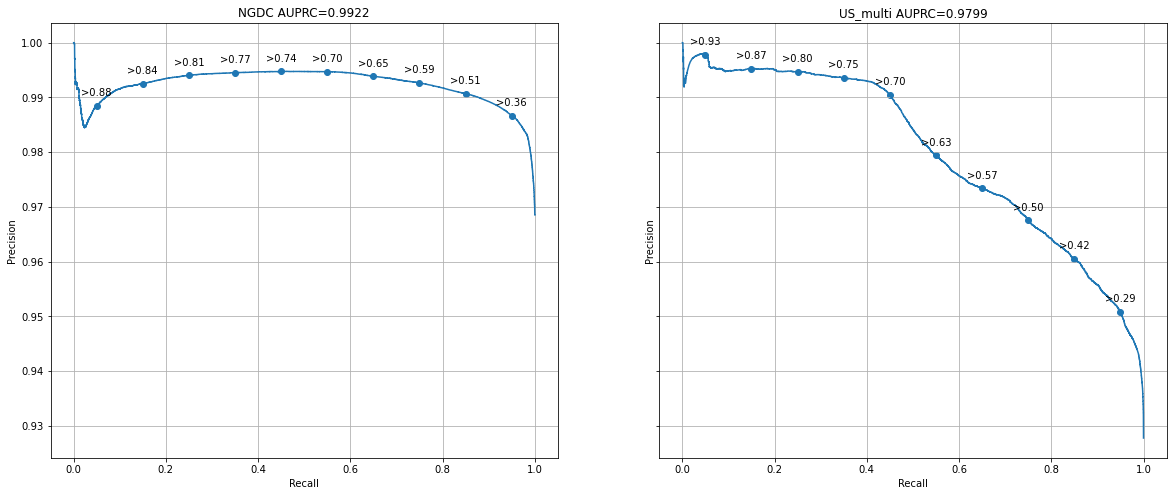

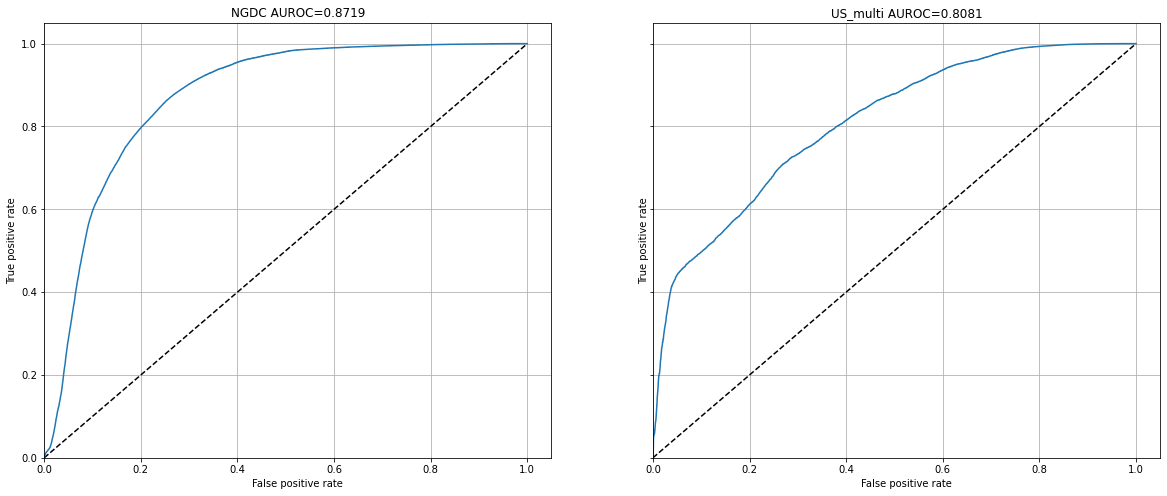

In [3]:
scores_dir = "/swot2/features/MODEL_RUNS/12_NO_NDP10/train-test-split/runtime_scores/"
plot_PRCROC(sources,scores_dir)

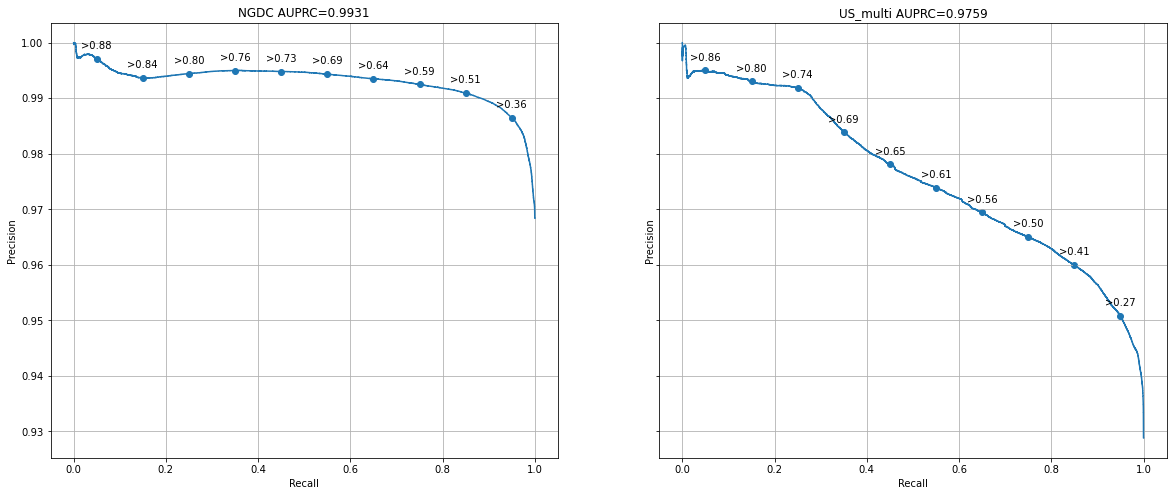

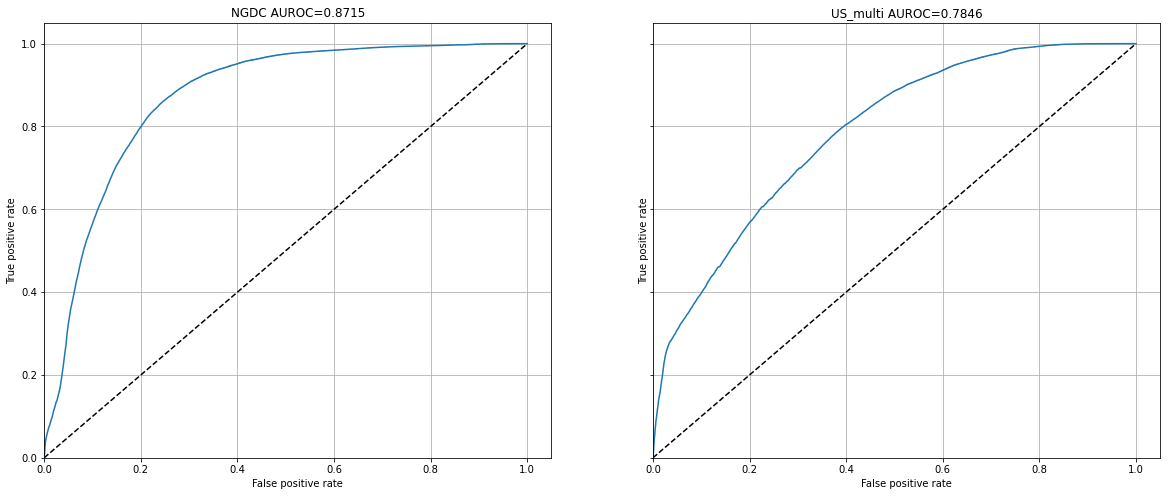

In [4]:
plot_PRCROC(sources,scores_dir,all_model=True)

# NDP30 + a few parameters
Here's a little mini-test I needed to run, there are three model runs. First, I removed NDP30 which is sort of the last of the "spatial" features that I think would bias the model in favor of lat/lon it has already seen.

The next test is to increase the learning rate to 0.05. Initially, this was set at 0.01 and there were 1000 iterations. When I decreased the number of iterations to 500, I should've increased the learning rate.

Finally, I added L2 regularization to the cost function with lambda_l2 = 1.0

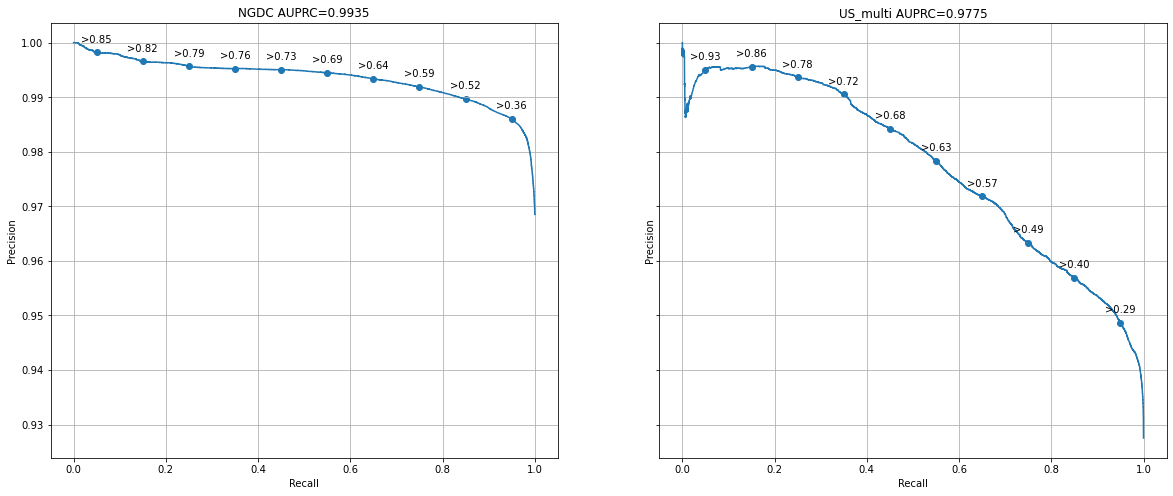

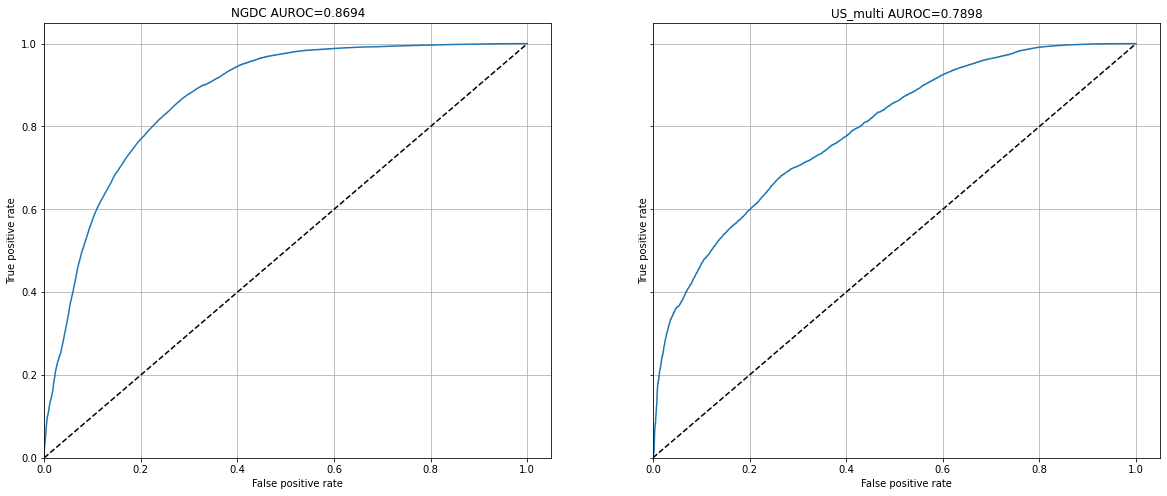

In [5]:
scores_dir = "/swot2/features/MODEL_RUNS/13_NO_NDP30/train-test-split/runtime_scores/"
plot_PRCROC(sources,scores_dir)